# 23/CS/301 Piyush Yadav

## Lab 10- Clustering
## Learning Outcomes
### By the end of this lab, students will be able to:
- Apply K-Means clustering (choose k with elbow)
- Apply Hierarchical clustering + dendrograms
- Evaluate with silhouette score.


### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

### Step 2: Load and Prepare the Dataset

In [4]:
# Load dataset
df = pd.read_csv("COMPLETE_DATA.csv")

# Select the required 17 features (total tweets – most 7)
features = df.iloc[:, df.columns.get_loc('total tweets'):df.columns.get_loc('most 7') + 1]

# Handle missing values if any
features = features.dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

### Step 3: K-Means Clustering (Choosing k with Elbow Method)

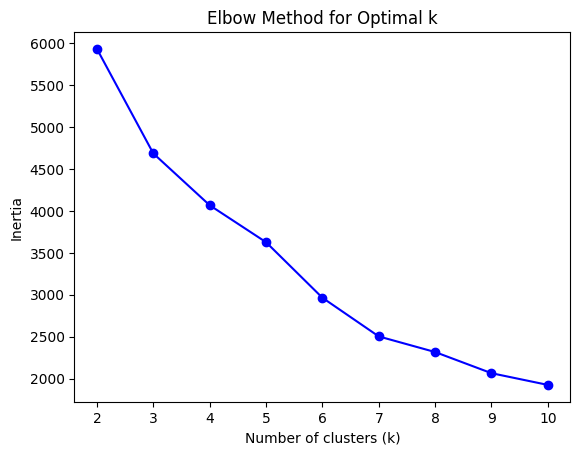

In [5]:
inertia = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Plot Elbow Curve
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### Step 4: Fit K-Means and Evaluate

In [6]:
optimal_k = 3  # example — pick based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Silhouette Score
sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score (K-Means): {sil_kmeans:.4f}")

Silhouette Score (K-Means): 0.6260


### Step 5: Hierarchical Clustering + Dendrogram

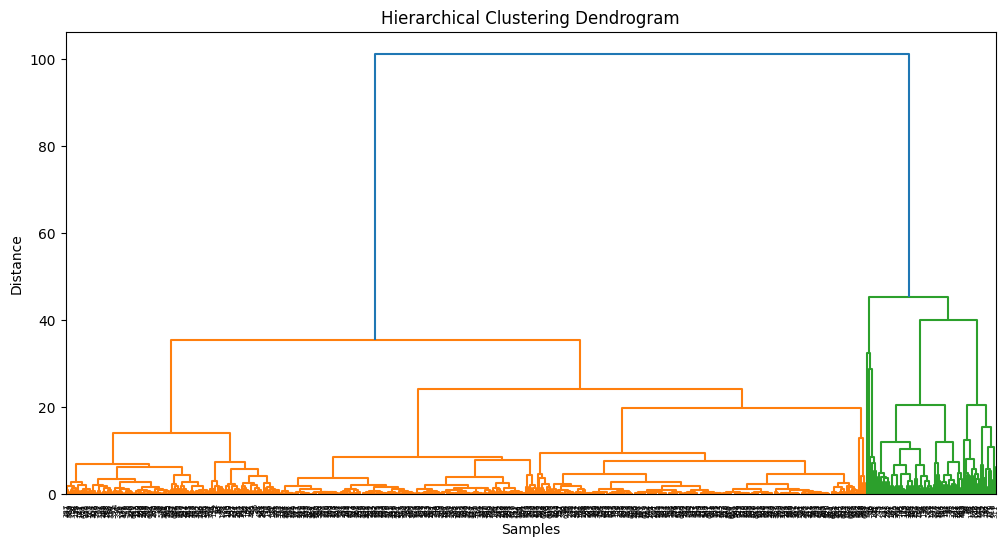

In [7]:
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

### Step 6: Apply Agglomerative Clustering and Evaluate

In [8]:
hier = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hier_labels = hier.fit_predict(X_scaled)

sil_hier = silhouette_score(X_scaled, hier_labels)
print(f"Silhouette Score (Hierarchical): {sil_hier:.4f}")

Silhouette Score (Hierarchical): 0.6693


### Step 7: PCA for 2D Visualization

In [9]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance by 2 components: {pca.explained_variance_ratio_.sum():.2%}")

Explained variance by 2 components: 82.63%


### Step 8: Visualize K-Means Clusters

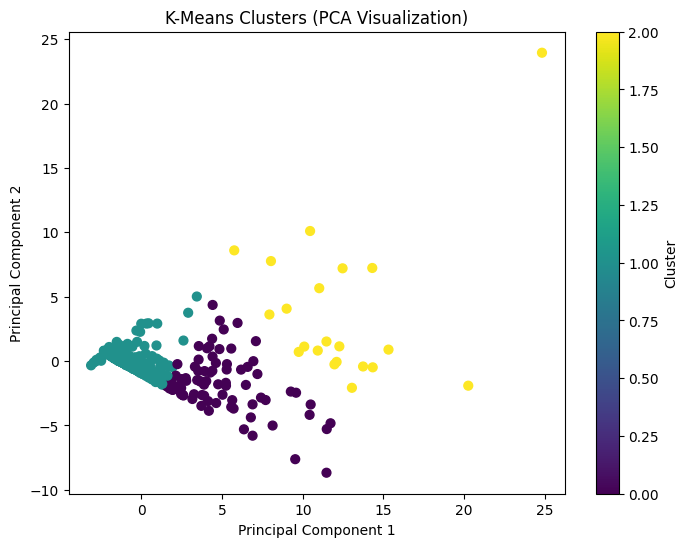

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=40)
plt.title('K-Means Clusters (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### Step 9: Visualize Hierarchical Clusters

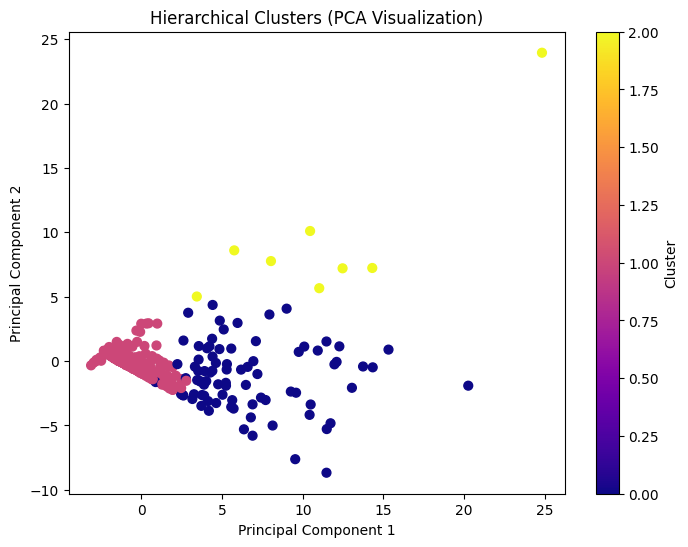

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hier_labels, cmap='plasma', s=40)
plt.title('Hierarchical Clusters (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### Step 10: Full Evaluation Summary

In [12]:
print("=== Evaluation Summary ===")
print(f"Silhouette Score (K-Means): {sil_kmeans:.4f}")
print(f"Silhouette Score (Hierarchical): {sil_hier:.4f}")

=== Evaluation Summary ===
Silhouette Score (K-Means): 0.6260
Silhouette Score (Hierarchical): 0.6693
